# Assignment 4

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [20]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.datasets import fashion_mnist

tf.get_logger().setLevel('INFO')

---
### Step 1: Data ingestion

You'll train a binary classifier using the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. This consists of 70,000 grayscale images (28x28). Each image is associated with 1 of 10 classes. The dataset was split by the creators; there are 60,000 training images and 10,000 test images. Note also that Tensorflow includes a growing [library of datasets](https://www.tensorflow.org/datasets/catalog/overview) and makes it easy to load them in numpy arrays.

In [21]:
# Load the Fashion MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

---
### Step 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) and Data Preprocessing are often iterative processes that involve going back and forth to refine and improve the quality of data analysis and preparation. However, the specific order can vary depending on the project's requirements. In some cases, starting with EDA, as you see in this assignment, could be more useful, but there is no rigid rule dictating the sequence in all situations.

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following tasks:

1. Print the shapes and types of (X_train, Y_train) and (X_test, Y_test). Interpret the shapes (i.e., what do the numbers represent?). Hint: For types use the <span style="color:chocolate">type()</span> function.
2. Define a list of strings of class names corresponding to each class in (Y_train, Y_test). Call this list label_names. Hint: Refer to the Fashion MNIST documentation.

In [22]:
# YOUR CODE HERE
# 1)
# Print the shapes and types of (X_train, Y_train) and (X_test, Y_test):
print(f'The shapes of (X_train, Y_train) are: {X_train.shape, Y_train.shape}')
print(f'The types of (X_train, Y_train) are: {type(X_train), type(Y_train)}')

print(f'The shapes of (X_test, Y_test) are: {X_test.shape, Y_test.shape}')
print(f'The types of (X_train, Y_train) are: {type(X_train), type(Y_train)}')

# The numbers represent each image and their class label. In this instance,
# the training dataset is composed of 60,000 images of 28 x 28 pixels. Each pixel
# is encoded with a color value from 0-255. The output (Y_train) is 60,000
# labels corresponding to numerical values from 0-9. Similarly, the test dataset
# is comprised of 10,000 images of 28 x 28 pixels. The output (Y_test) is 10,000
# labels corresponding to numerical values from 0-9.

# 2)
# Define a list of strings of class names corresponding to each class in
# (Y_train, Y_test):
label_names = ['T-shirt/top',
              'Trouser',
              'Pullover',
              'Dress',
              'Coat',
              'Sandal',
              'Shirt',
              'Sneaker',
              'Bag',
              'Ankle boot']

The shapes of (X_train, Y_train) are: ((60000, 28, 28), (60000,))
The types of (X_train, Y_train) are: (<class 'numpy.ndarray'>, <class 'numpy.ndarray'>)
The shapes of (X_test, Y_test) are: ((10000, 28, 28), (10000,))
The types of (X_train, Y_train) are: (<class 'numpy.ndarray'>, <class 'numpy.ndarray'>)


### <span style="color:chocolate">Exercise 2:</span> Getting to know your data - cont'd (5 points)

Fashion MNIST images have one of 10 possible labels (shown above).

Complete the following tasks:

1. Display the first 5 images in X_train for each class in Y_train, arranged in a 10x5 grid. Use the label_names list defined above;
2. Determine the minimum and maximum pixel values for images in the X_train dataset.

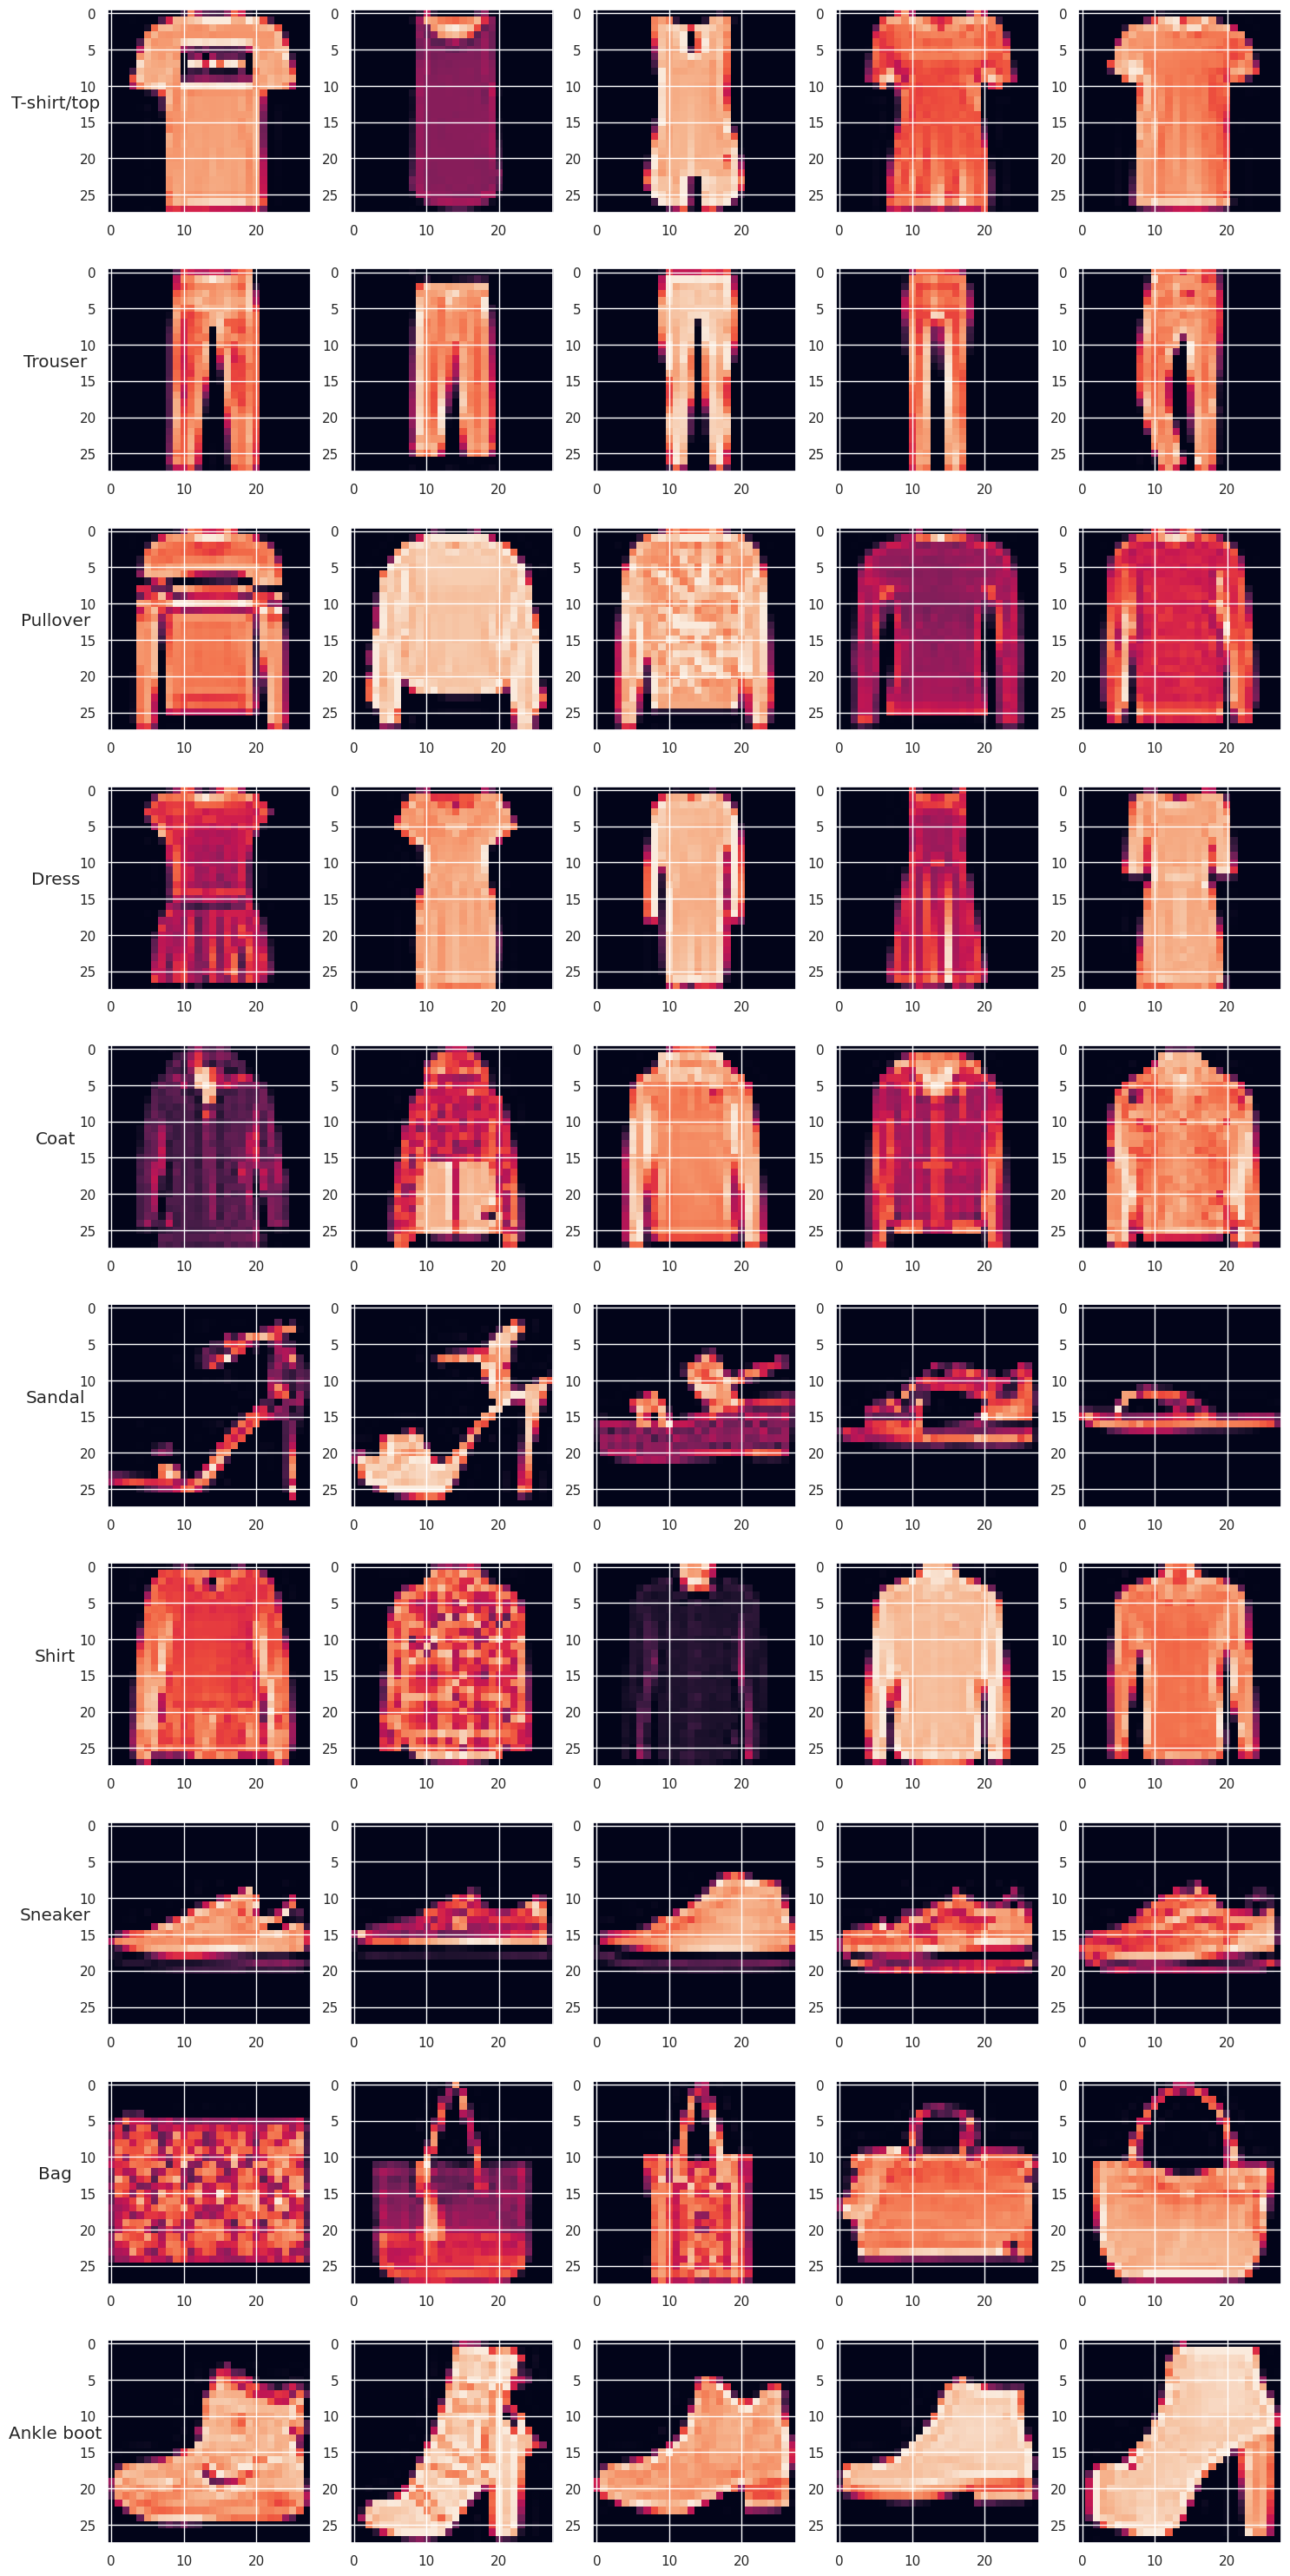

The minimum pixel values is:  0
The maximum pixel values is:  255


In [23]:
# YOUR CODE HERE
# First, find the location of the first 5 indices per class:
t_shirt = np.where(Y_train == 0)[0][:5]
trouser = np.where(Y_train == 1)[0][:5]
pullover = np.where(Y_train == 2)[0][:5]
dress = np.where(Y_train == 3)[0][:5]
coat = np.where(Y_train == 4)[0][:5]
sandal = np.where(Y_train == 5)[0][:5]
shirt = np.where(Y_train == 6)[0][:5]
sneaker = np.where(Y_train == 7)[0][:5]
bag = np.where(Y_train == 8)[0][:5]
ankle_boot = np.where(Y_train == 9)[0][:5]

# Using those indices, create a new array of pictures that contain the first 5 images:
t_shirt_images = X_train[t_shirt]
trouser_images = X_train[trouser]
pullover_images = X_train[pullover]
dress_images = X_train[dress]
coat_images = X_train[coat]
sandal_images = X_train[sandal]
shirt_images = X_train[shirt]
sneaker_images = X_train[sneaker]
bag_images = X_train[bag]
ankle_boot_images = X_train[ankle_boot]

# Combine all images into a list of lists for easier plotting later:
all_images = [t_shirt_images, trouser_images, pullover_images, dress_images, coat_images,
              sandal_images, shirt_images, sneaker_images, bag_images, ankle_boot_images]

# Create a figure with 10 rows and 5 columns
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(15, 30))

# Plot each image by looping through the the image list
for i, images in enumerate(all_images):
    for j, img in enumerate(images):
        ax = axes[i, j]
        ax.imshow(img)

# Loop through and plot each label:
for ax, label_name in zip(axes[:, 0], label_names):
    ax.set_ylabel(label_name, rotation=0, size='large', labelpad=20)
    ax.yaxis.set_label_position("left")

plt.tight_layout()
plt.show()

# 2)
# Determine the min and max pixel values of the array:
pixel_min = np.min(X_train)
pixel_max = np.max(X_train)

print('The minimum pixel values is: ', pixel_min)
print('The maximum pixel values is: ', pixel_max)

---
### Step 3: Data preprocessing

This step is essential for preparing this image data in a format that is suitable for ML algorithms.

### <span style="color:chocolate">Exercise 3:</span> Feature preprocessing (5 points)

In the previous lab, the input data had just a few features. Here, we treat **every pixel value as a separate feature**, so each input example has 28x28 (784) features!

In this exercise, you'll perform the following tasks:

1. Normalize the pixel values in both X_train and X_test data so they range between 0 and 1;
2. For each image in X_train and X_test, flatten the 2-D 28x28 pixel array to a 1-D array of size 784. Hint: use the <span style="color:chocolate">reshape()</span> method available in NumPy. Note that by doing so you will overwrite the original arrays;
3. Pint the shape of X_train and X_test arrays.

In [24]:
# YOUR CODE HERE
# 1)
# Normalize the pixel values in X_train and X_test data so they range between (0,1)
# We will use the MinMaxScaler from SciKitLearn:
mms = MinMaxScaler()

# 2)
# In order to use the MinMaxScaler, we must first reshape the data:
X_train = mms.fit_transform(X_train.reshape(-1, 28 * 28))
X_test = mms.transform(X_test.reshape(-1, 28 * 28))

# 3)
# Print the shape of the new X_train and X_test datasets:
print('The new shape of X_train is: ', X_train.shape)
print('The new shape of X_test is: ', X_test.shape)

The new shape of X_train is:  (60000, 784)
The new shape of X_test is:  (10000, 784)


### <span style="color:chocolate">Exercise 4:</span> Label preprocessing (5 points)

This assignment involves binary classification. Specifically, the objective is to predict whether an image belongs to the sneaker class (class 7) or not.

Therefore, write code so that for each example in (Y_train, Y_test), the outcome variable is represented as follows:
* $y=1$, for sneaker class (positive examples), and
* $y=0$, for non-sneaker class (negative examples).

Note: To avoid "ValueError: assignment destination is read-only", first create a copy of the (Y_train, Y_test) data and call the resulting arrays (Y_train, Y_test). Then overwrite the (Y_train, Y_test) arrays to create binary outcomes.

In [25]:
from re import X
# Make copies of the original dataset for binary classification task.
Y_train = np.copy(Y_train)
Y_test = np.copy(Y_test)

# YOUR CODE HERE
# For comparison, print the first 10 values of Y_train & Y_test before the new values:
print('The first 10 values of Y_train (before transforming) are:\n', Y_train[0:10])
print('The first 10 values of Y_test (before transforming) are:\n', Y_test[0:10])

# We will use the np.select method, which requres condition and choice rules:
Y_train_cond_list = [Y_train != 7, Y_train == 7]
Y_test_cond_list = [Y_test != 7, Y_test == 7]
choice_list = [0, 1]

# Use the np.select method to transform Y_train and Y_test:
Y_train = np.select(condlist=Y_train_cond_list, choicelist=choice_list)
Y_test = np.select(condlist=Y_test_cond_list, choicelist=choice_list)

# Print the new values of Y_train and Y_test after transforming:
print('The first 10 values of Y_train (after transforming) are:\n', Y_train[0:10])
print('The first 10 values of Y_test (after transforming) are:\n', Y_test[0:10])

The first 10 values of Y_train (before transforming) are:
 [9 0 0 3 0 2 7 2 5 5]
The first 10 values of Y_test (before transforming) are:
 [9 2 1 1 6 1 4 6 5 7]
The first 10 values of Y_train (after transforming) are:
 [0 0 0 0 0 0 1 0 0 0]
The first 10 values of Y_test (after transforming) are:
 [0 0 0 0 0 0 0 0 0 1]


### <span style="color:chocolate">Exercise 5:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Retain 20% from the training data for validation purposes. Set random state to 1234. Name the resulting dataframes as follows: X_train_mini, X_val, Y_train_mini, Y_val.
2. Print the shape of each array.

In [7]:
# YOUR CODE HERE
# 1)
# Use the train_test_split() method to split the data using 80% for train, 20%
# for validation:
X_train_mini, X_val, Y_train_mini, Y_val = train_test_split(X_train, Y_train,
    train_size=0.8, test_size=0.2, random_state=1234)

# 2)
# Print the shape of each array:
print('The shape of X_train_mini is: ', X_train_mini.shape)
print('The shape of X_val is: ', X_val.shape)
print('The shape of Y_train_mini is: ', Y_train_mini.shape)
print('The shape of Y_val is: ', Y_val.shape)

The shape of X_train_mini is:  (48000, 784)
The shape of X_val is:  (12000, 784)
The shape of Y_train_mini is:  (48000,)
The shape of Y_val is:  (12000,)


### <span style="color:chocolate">Exercise 6:</span> Data shuffling (10 points)

Since you'll be using Batch Gradient Descent (BGD) for training, it is important that **each batch is a random sample of the data** so that the gradient computed is representative.

1. Use [integer array indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html#integer-array-indexing) to re-order (X_train_mini, Y_train_mini) using a list of shuffled indices. In doing so, you will overwrite the arrays.

In [8]:
np.random.seed(0)
# YOUR CODE HERE
# Create an array of shuffled indices, with a length corresponding to the length
# of X_train_mini and Y_train_mini:
shuffled_indices = np.random.permutation(len(X_train_mini))

# Create the new arrays with the shuffled indices:
X_train_mini = X_train_mini[shuffled_indices]
Y_train_mini = Y_train_mini[shuffled_indices]

---
### Step 4: Exploratory Data Analysis (EDA) - cont'd

Before delving into model training, let's further explore the raw feature values by comparing sneaker and non-sneaker training images.

### <span style="color:chocolate">Exercise 7:</span> Pixel distributions (10 points)

1. Identify all sneaker images in X_train_mini and calculate the mean pixel value for each sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all sneaker images.
2. Identify all non-sneaker images in X_train_mini and calculate the mean pixel value for each non-sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all non-sneaker images.
3. Based on the histogram results, assess whether there is any evidence suggesting that pixel values can be utilized to distinguish between sneaker and non-sneaker images. Justify your response.

Notes: Make sure to provide a descriptive title and axis labels for each histogran. Make sure you utilize Y_train_mini to locate the sneaker and non-sneaker class.

The mean pixel value across all sneaker images is:  0.16831458343778843
The mean pixel value across all non-sneaker images is:  0.2990342737154158


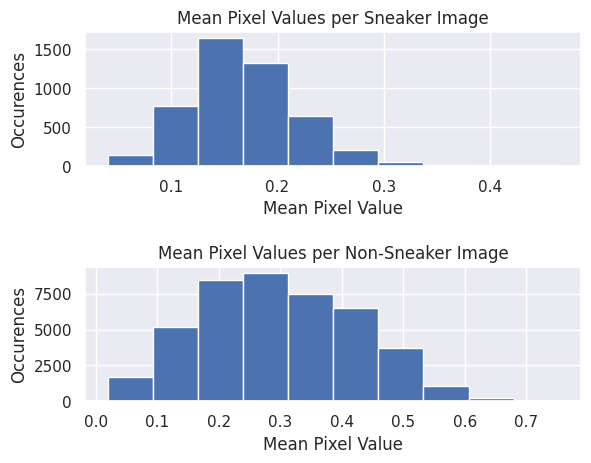

In [9]:
# YOUR CODE HERE
# 1)
# Identify all sneaker images in X_train_mini and calculate the mean pixel value
# for each sneaker image. First, identify the indices for sneaker images:
Y_train_mini_sneaker_indices = np.where(Y_train_mini == 1)[0]

# Identify the corresponding X_train_mini images for these indices:
X_train_mini_sneaker_indices = X_train_mini[Y_train_mini_sneaker_indices]

# Calculate the mean pixel value for each sneaker image:
X_train_mini_sneaker_row_mean = np.mean(X_train_mini_sneaker_indices, axis=1)

# Visualize the mean pixels per sneaker image:
ax1 = plt.subplot(2, 1, 1)
ax1.hist(X_train_mini_sneaker_row_mean)
ax1.set_xlabel('Mean Pixel Value')
ax1.set_ylabel('Occurences')
ax1.set_title('Mean Pixel Values per Sneaker Image')

# Print the overall mean pixel value:
X_train_mini_sneaker_overall_mean = np.mean(X_train_mini_sneaker_indices)
print('The mean pixel value across all sneaker images is: ',
      X_train_mini_sneaker_overall_mean)

# 2)
# Identify all non-sneaker images in X_train_mini and calculate the mean pixel
# value for each non-sneaker image. First, identify the indices for non-sneaker
# images:
Y_train_mini_non_sneaker_indices = np.where(Y_train_mini == 0)[0]

# Identify the corresponding X_train_mini images for these indices:
X_train_mini_non_sneaker_indices = X_train_mini[Y_train_mini_non_sneaker_indices]

# Calculate the mean pixel value for each sneaker image:
X_train_mini_non_sneaker_row_mean = np.mean(X_train_mini_non_sneaker_indices, axis = 1)

# Visualize the mean pixels per non-sneaker image:
ax2 = plt.subplot(2, 1, 2)
ax2.hist(X_train_mini_non_sneaker_row_mean)
ax2.set_xlabel('Mean Pixel Value')
ax2.set_ylabel('Occurences')
ax2.set_title('Mean Pixel Values per Non-Sneaker Image')
plt.subplots_adjust(hspace=0.75)

# Print the overall mean pixel value:
X_train_mini_non_sneaker_overall_mean = np.mean(X_train_mini_non_sneaker_indices)
print('The mean pixel value across all non-sneaker images is: ',
      X_train_mini_non_sneaker_overall_mean)

# 3)
# Based upon the results of the overall mean pixel values and the histograms
# below, it appears that pixel values CANNOT be used to evaluate whether
# an image is classified as a sneaker or not. This is because the mean pixel
# value for sneakers and non-sneakers is very similar, and each histogram
# follows a very similar shape.

---
### Step 4: Modeling

### <span style="color:chocolate">Exercise 8:</span> Baseline model (10 points)

When dealing with classification problems, a simple baseline is to select the *majority* class (the most common label in the training set) and use it as the prediction for all inputs.

With this information in mind:

1. What is the number of sneaker images in Y_train_mini?
2. What is the number of non-sneaker images in Y_train_mini?
3. What is the majority class in Y_train_mini?
4. What is the accuracy of a majority class classifier for Y_train_mini?
5. Implement a function that computes the Log Loss (binary cross-entropy) metric and use it to evaluate this baseline on both the mini train (Y_train_mini) and validation (Y_val) data. Use 0.1 as the predicted probability for your baseline (reflecting what we know about the original distribution of classes in the mini training data). Hint: for additional help, see the file ``04 Logistic Regression with Tensorflow_helpers.ipynb``.

In [10]:
# YOUR CODE HERE
# 1)
# Find the number of sneaker images in the Y_train_mini by using the array we
# created from the last problem and calculating the length:
number_of_sneakers = len(Y_train_mini_sneaker_indices)
print('The number of sneaker images in Y_train_mini = ', number_of_sneakers)

# 2)
# Find the number of non-sneaker images in the Y_train_mini by using the array we
# created from the last problem and calculating the length:
number_of_non_sneakers = len(Y_train_mini_non_sneaker_indices)
print('The number of non-sneaker images in Y_train_mini = ', number_of_non_sneakers)

# 3)
# The majority class in Y_train_mini is non-sneaker images.

# 4)
# The accuracy of of the majority class classifier can be calculated as the
# true predictions divided by the total predictions. In this case it would be:
# non-sneaker images / (sneaker images + non-sneaker images):
majority_class_accuracy = number_of_non_sneakers/(number_of_non_sneakers + number_of_sneakers)
print('The accuracy of the majority class classifier = ', majority_class_accuracy)

# 5)
# Implement a function that computes Log Loss (binary cross-entropy):
def log_loss(x, predicted_probability):
  """Args:
        x: input array to calculate the log loss
        predicted_probability: probability for each value

      Output:
        answer: final logistic log loss calculated as a single value."""

  # Create an array of losses for each value:
  loss = (x*np.log(predicted_probability)) + ((1-x)*(np.log(1-predicted_probability)))

  # Sum the losses:
  sum_loss = np.sum(loss)

  # Compute the average loss by calculating the length of the array and dividing:
  n = len(x)

  answer = - (sum_loss / n)

  return answer

Y_train_mini_log_loss = log_loss(Y_train_mini, predicted_probability=0.1)
print('The log loss of Y_train_mini = ', Y_train_mini_log_loss)

Y_val_log_loss = log_loss(Y_val, predicted_probability=0.1)
print('The log loss of Y_val = ', Y_val_log_loss)

The number of sneaker images in Y_train_mini =  4800
The number of non-sneaker images in Y_train_mini =  43200
The accuracy of the majority class classifier =  0.9
The log loss of Y_train_mini =  0.3250829733914482
The log loss of Y_val =  0.3250829733914482


### <span style="color:chocolate">Exercise 9:</span> Improvement over Baseline with TensorFlow (10 points)

Let's use TensorFlow to train a binary logistic regression model much like you did in the previous assignment. The goal here is to build a ML model to improve over the baseline classifier.

1. Fill in the <span style="color:green">NotImplemented</span> parts of the build_model() function below by following the instructions provided as comments. Hint: the activation function, the loss, and the evaluation metric are different compared to the linear regression model;
2. Build and compile a model using the build_model() function and the (X_train_mini, Y_train_mini) data. Set learning_rate = 0.0001. Call the resulting object *model_tf*.
3. Train *model_tf* using the (X_train_mini, Y_train_mini) data. Set num_epochs = 5 and batch_size=32. Pass the (X_val, Y_val) data for validation. Hint: see the documentation behind the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method.
3. Generate a plot (for the mini training and validation data) with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title. Hint: check what the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method returns.

In [11]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,                                 # output dim
      input_shape=[num_features],       # input dim
      use_bias=True,                           # use a bias (intercept) param
      activation='sigmoid',
      kernel_initializer=tf.ones_initializer,  # initialize params to 1
      bias_initializer=tf.ones_initializer,    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch SGD
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. Select the accuracy metric. This finalizes the graph for training.
  model.compile(
      optimizer=optimizer,
      loss='binary_crossentropy',
      metrics=['accuracy'],
  )

  return model

In [12]:
tf.random.set_seed(0)
# 2. Build and compile model
# YOUR CODE HERE
num_features = X_train_mini.shape[1]
model_tf = build_model(num_features=num_features, learning_rate=0.0001)

# 3. Fit the model
# YOUR CODE HERE
model_tf_fit = model_tf.fit(
    x=X_train_mini,
    y=Y_train_mini,
    epochs=5,
    batch_size=32,
    validation_data=(X_val, Y_val)
)


Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 205.6392 - accuracy: 0.1000 - val_loss: 200.0053 - val_accuracy: 0.1000
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 193.1124 - accuracy: 0.1000 - val_loss: 187.4478 - val_accuracy: 0.1000
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 180.5853 - accuracy: 0.1000 - val_loss: 174.8905 - val_accuracy: 0.1000
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 168.0584 - accuracy: 0.1000 - val_loss: 162.3330 - val_accuracy: 0.1000
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 155.5314 - accuracy: 0.1000 - val_loss: 149.7755 - val_accuracy: 0.1000


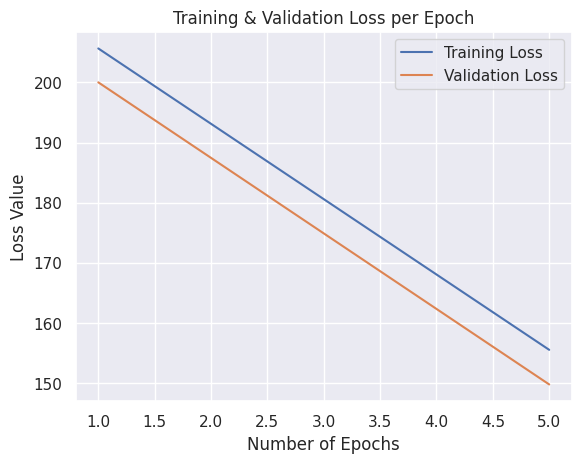

In [13]:
# 4)
# Generate a plot for the mini and validation data:
model_tf_loss = model_tf_fit.history['loss']
model_tf_val_loss = model_tf_fit.history['val_loss']

num_epochs = np.arange(1, len(model_tf_loss) + 1)

plt.plot(num_epochs, model_tf_loss, label='Training Loss')
plt.plot(num_epochs, model_tf_val_loss, label='Validation Loss')

plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.title('Training & Validation Loss per Epoch')
plt.legend();

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning is a crucial step in optimizing ML models. It involves systematically adjusting hyperparameters such as learning rate, number of epochs, and optimizer to find the model configuration that leads to the best generalization performance.

This tuning process is typically conducted by monitoring the model's performance on the validation vs. training set. It's important to note that using the test set for hyperparameter tuning can compromise the integrity of the evaluation process by violating the assumption of "blindness" of the test data.

### <span style="color:chocolate">Exercise 10:</span> Hyperparameter tuning (10 points)

1. Fine-tune the hyperparameters of *model_tf* to determine the setup that yields the most optimal performance. Feel free to explore various values for the hyperparameters. Hint: ask your instructors and TAs for help if in doubt.

After identifying your preferred model configuration, print the following information:

2. The first five learned parameters of the model (this should include the bias term);
3. The loss at the final epoch on both the mini training and validation datasets;
4. The percentage difference between the losses observed on the mini training and validation datasets.
5. Compare the training/validation loss of the TensorFlow model (model_tf) with the baseline model's loss. Does the TensorFlow model demonstrate an improvement over the baseline model?


Please note that we will consider 'optimal model configuration' any last-epoch loss that is below 0.08.

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 205.6392 - accuracy: 0.1000 - val_loss: 200.0053 - val_accuracy: 0.1000
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 193.1124 - accuracy: 0.1000 - val_loss: 187.4478 - val_accuracy: 0.1000
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 180.5853 - accuracy: 0.1000 - val_loss: 174.8905 - val_accuracy: 0.1000
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 168.0584 - accuracy: 0.1000 - val_loss: 162.3330 - val_accuracy: 0.1000
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 155.5314 - accuracy: 0.1000 - val_loss: 149.7755 - val_accuracy: 0.1000
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 143.0045 - accuracy: 0.1000 - val_loss: 137.2180 - val_accuracy: 0.1000
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 130.4775 - accuracy: 0.1000 - val_lo

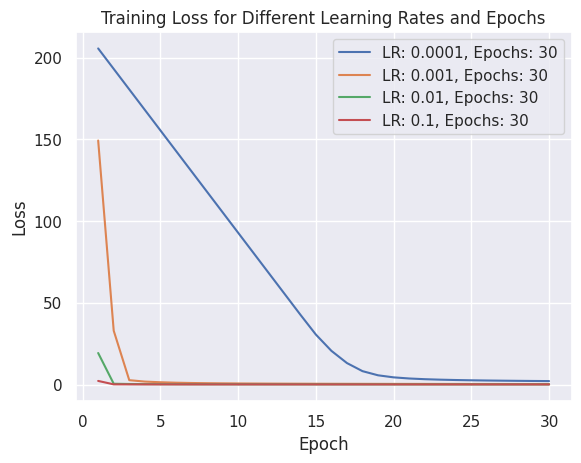

In [14]:
# YOUR CODE HERE
# 1)
# We will begin by testing out different learning rates at a higher epoch count
# to determine which learning rate is the best for this model:

epochs = [30]
learning_rates = [0.0001, 0.001, 0.01, 0.1]

num_features = X_train_mini.shape[1]

for epoch in epochs:
  for learning_rate in learning_rates:

    keys = (learning_rate, epoch)

    model_tf = build_model(num_features=num_features, learning_rate=learning_rate)

    model_tf_fit = model_tf.fit(
      x=X_train_mini,
      y=Y_train_mini,
      epochs=epoch,
      batch_size=32,
      validation_data=(X_val, Y_val)
    )
    model_tf_loss = model_tf_fit.history['loss']
    model_tf_val_loss = model_tf_fit.history['val_loss']
    model_tf_epochs = np.arange(1, len(model_tf_loss) + 1)

    plt.plot(model_tf_epochs, model_tf_loss, label=f'LR: {learning_rate}, Epochs: {epoch}')

    # Add labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss for Different Learning Rates and Epochs')
    plt.legend();


In [15]:
# 2)
# Based on the results from above, we will use a learning rate of 0.1 for 30 epochs:
num_features = X_train_mini.shape[1]
learning_rate = 0.1
epoch = 30

model_tf = build_model(num_features=num_features, learning_rate=learning_rate)

model_tf_fit = model_tf.fit(
      x=X_train_mini,
      y=Y_train_mini,
      epochs=epoch,
      batch_size=32,
      validation_data=(X_val, Y_val)
    )

Epoch 1/30
1500/1500 [==============================] - 6s 3ms/step - loss: 2.1991 - accuracy: 0.9258 - val_loss: 0.1220 - val_accuracy: 0.9589
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0986 - accuracy: 0.9680 - val_loss: 0.0758 - val_accuracy: 0.9708
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0721 - accuracy: 0.9762 - val_loss: 0.0636 - val_accuracy: 0.9743
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0623 - accuracy: 0.9789 - val_loss: 0.0570 - val_accuracy: 0.9778
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0568 - accuracy: 0.9806 - val_loss: 0.0627 - val_accuracy: 0.9739
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0541 - accuracy: 0.9821 - val_loss: 0.0522 - val_accuracy: 0.9796
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0522 - accuracy: 0.9822 - val_loss: 0.0505 - val_accuracy:

In [16]:
# 2) Continued...
# The first 5 learned parameters (including bias):
parameters = model_tf.layers[0].get_weights()[0]
print('The first 5 parameters of the model are:\n', parameters[:5])

# 3)
# The loss at the final epoch on both the mini training and validation datasets:
model_tf_loss = model_tf_fit.history['loss'][-1]
print('The final loss on the mini training data is: ', model_tf_loss)

model_tf_val_loss = model_tf_fit.history['val_loss'][-1]
print('The final loss on the validation data is: ', model_tf_val_loss)

# 4)
# Print the percentage difference between the losses observed on the training and validation datasets:
diff = ((model_tf_val_loss - model_tf_loss) / model_tf_loss)*100
print('% Difference = ', diff)

# 5)
# Compared to the original baseline model, the TensorFlow model performed much better.
# The original baseline model had a final loss value of 0.32, whereas the
# TensorFlow model had a final loss value of 0.044.

The first 5 parameters of the model are:
 [[0.9933775 ]
 [0.99004835]
 [0.9422894 ]
 [0.9224162 ]
 [0.91331106]]
The final loss on the mini training data is:  0.04373509809374809
The final loss on the validation data is:  0.04675798490643501
% Difference =  6.911809837964077


---
### Step 6: Evaluation and Generalization


Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

### <span style="color:chocolate">Exercise 11:</span> Computing accuracy (10 points)

1. Calculate aggregate accuracy on both mini train and test datasets using a probability threshold of 0.5. Hint: You can utilize the <span style="color:chocolate">model.evaluate()</span> method provided by tf.keras. Note: Aggregate accuracy measures the overall correctness of the model across all classes in the dataset;

2. Does the model demonstrate strong aggregate generalization capabilities? Provide an explanation based on your accuracy observations.

In [17]:
# YOUR CODE HERE
# 1)
# Use the model.evaluate() method to calculate aggregate accuracy:
training_accuracy = model_tf.evaluate(x=X_train_mini, y=Y_train_mini)
test_accuracy = model_tf.evaluate(x=X_test, y=Y_test)

print('Accuracy of the training dataset = ', training_accuracy[1])
print('Accuracy of the test dataset = ', test_accuracy[1])

# 2)
# Yes, the model demonstrates strong generalization capabilities, as evidenced by
# the accuracy values for the training and test datasets. The training dataset
# accuracy of 98.4% is only slightly higher than the accuracy of the test
# dataset accuracy of 98.1%, indicating only slight overfitting.

313/313 [==============================] - 1s 2ms/step - loss: 0.0479 - accuracy: 0.9813
Accuracy of the training dataset =  0.9849374890327454
Accuracy of the test dataset =  0.9812999963760376


### <span style="color:chocolate">Exercise 12:</span> Fairness evaluation (10 points)

1. Generate and visualize the confusion matrix on the test dataset using a probability threshold of 0.5. Additionally, print the True Positives (TP), False Negatives (FN), False Positives (FP), and True Negatives (TN). Hint: you can utilize the <span style="color:chocolate">model.predict()</span> method available in tf.keras, and then the <span style="color:chocolate">confusion_matrix()</span>, <span style="color:chocolate">ConfusionMatrixDisplay()</span> methods available in sklearn.metrics;

2. Compute subgroup accuracy, separately for the sneaker and non-sneaker classes, on the test dataset using a probability threshold of 0.5. Reflect on any observed accuracy differences (potential lack of fairness) between the two classes.

3. Does the model demonstrate strong subgroup generalization capabilities? Provide an explanation based on your accuracy observations.

313/313 [==============================] - 1s 1ms/step
True Negatives =  8893
False Positives =  107
False Negatives =  80
True Positives =  920
Sneaker accuracy =  0.92
Non-sneaker accuracy =  0.9881111111111112


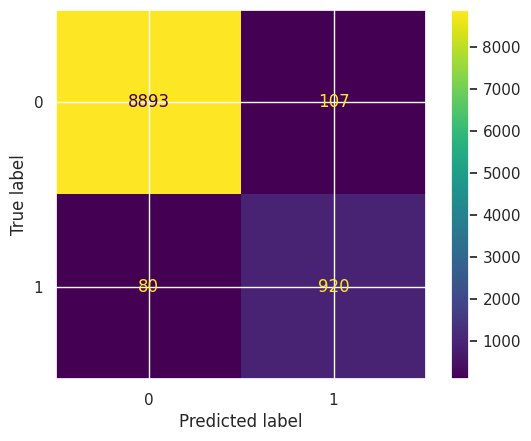

In [18]:
# YOUR CODE HERE
# 1)
# Generate and visualize the confusion matrix. First, compute predicted values
# using the X_test dataset:
X_test_predictions = model_tf.predict(x=X_test)

# Replace values based on probability threshold of 0.5:
X_test_predictions = np.where(X_test_predictions >= 0.5, 1, 0)

# Plot and display confusion matrix:
X_test_confusion_matrix = confusion_matrix(y_true=Y_test, y_pred=X_test_predictions)
disp = ConfusionMatrixDisplay(X_test_confusion_matrix)
disp.plot();

# Print TN, FP, FN, TP:
tn, fp, fn, tp = X_test_confusion_matrix.ravel()
print('True Negatives = ', tn)
print('False Positives = ', fp)
print('False Negatives = ', fn)
print('True Positives = ', tp)

# 2)
# Compute subgroup accuracy for the sneaker and non-sneaker classes:
sneaker_accuracy = tp / (tp + fn)
non_sneaker_accuracy = tn / (tn + fp)

print('Sneaker accuracy = ', sneaker_accuracy)
print('Non-sneaker accuracy = ', non_sneaker_accuracy)

# 3)
# Yes, the model represents strong subgroup generalization. However, it is important
# to note that the accuracy for the sneaker subgroup is lower than the accuracy
# for the non-sneaker subgroup. This is in somewhat contrast to the overall accuracy that
# was already determined above.

----
### <span style="color:chocolate">Bonus question</span> (20 points)

Is it possible to enhance the prediction accuracy for the sneaker class by performing the following steps?

1. Implement data balancing techniques, such as oversampling or undersampling, to equalize the representation of both classes.
2. After balancing the data, retrain the model on the balanced dataset.
3. Evaluate the model's performance, particularly focusing on the accuracy achieved for the sneaker class.

Note: provide a separate notebook for the Bonus exercise. Name it ``04 Logistic Regression with Tensorflow_bonus``.